In [2]:
import pandas as pd
import numpy as np
import pywt
from scipy.stats import median_absolute_deviation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats
import os

In [11]:
full_csv_file = '/home/srchand/Desktop/research/TVM_Intel_Fork/tvm/vta/sri_scripts/ro_uart_logs/working/csvs/test_data/resnet18_ro_with_axi_6m_667.csv'
reduced_csv_file = '/home/srchand/Desktop/research/TVM_Intel_Fork/tvm/vta/sri_scripts/ro_uart_logs/working/csvs/test_data/resnet18_ro_with_axi_6m_667_reduced.csv'

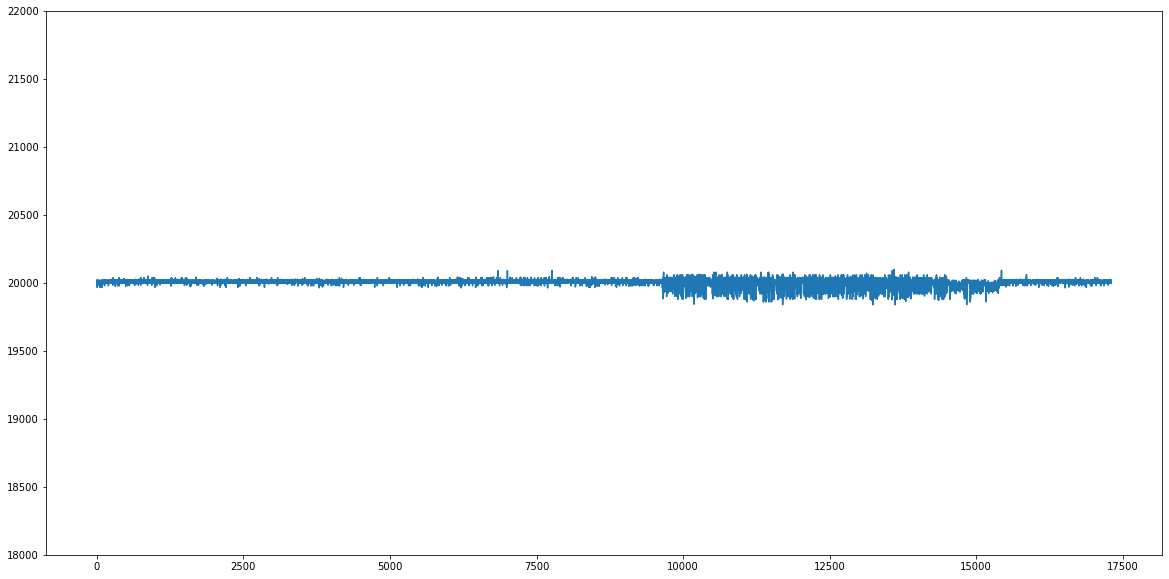

In [12]:


# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(full_csv_file)
lendf = len(df)

z_scores = stats.zscore(df['RO_VALUE'])
threshold = 5

df = df[(np.abs(z_scores) <= threshold)]
df.reset_index(drop=True, inplace=True)


df['RO_VALUE'].plot(subplots=True, figsize=(20,10))
plt.ylim(18000,22000)
plt.show()


In [18]:
start_index = 9500
end_index = 15625

exec_data = df.iloc[start_index : end_index]
exec_data.reset_index(drop=True, inplace=True)

exec_data.to_csv(reduced_csv_file)

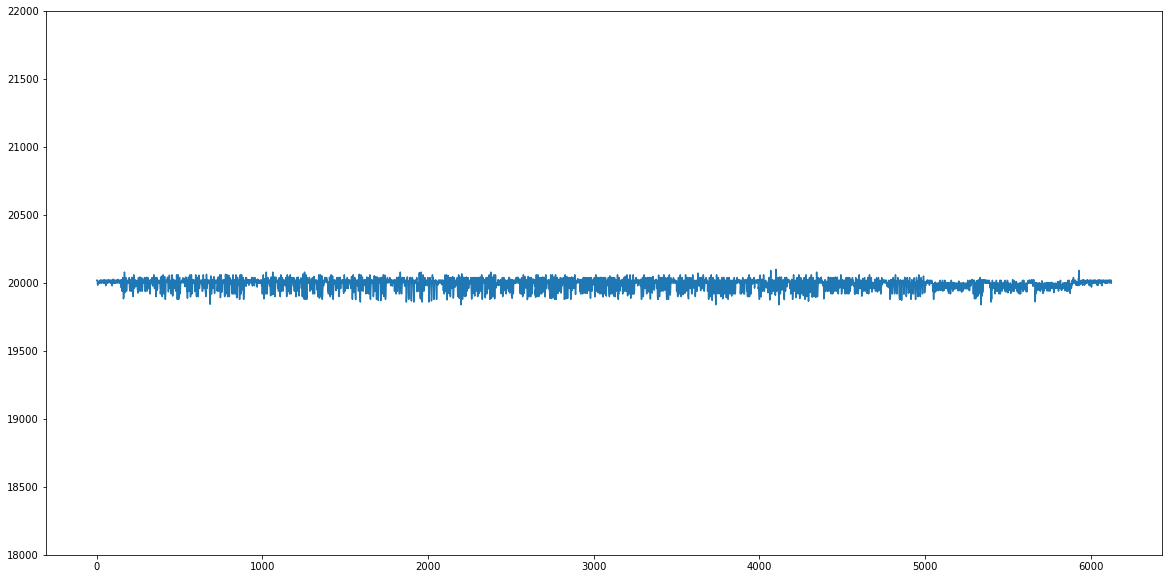

In [19]:
exec_data['RO_VALUE'].plot(subplots=True, figsize=(20,10))
plt.ylim(18000,22000)
plt.show()

In [24]:
train_df = pd.read_csv('/home/srchand/Desktop/research/NER_VTA/NER_VTA/data/ro_uart/rcg/extracted_features/new_reduced_manual/network_99_features.csv')



In [27]:
train_df=train_df.drop(columns=['Unnamed: 0','labels'])

In [28]:
len(train_df.columns)

402

In [29]:
with open('/home/srchand/Desktop/research/NER_VTA/NER_VTA/data/ro_uart/rcg/extracted_features/tmp/selected_features.txt','r') as myfile:
    features = myfile.readlines()

In [32]:
features = [feature.strip() for feature in features]

In [33]:
features

['RO_VALUE__cwt_coefficients__coeff_3__w_2__widths_(2, 5, 10, 20)',
 'RO_VALUE__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.0',
 'RO_VALUE__quantile__q_0.7',
 'RO_VALUE__first_location_of_maximum',
 'RO_VALUE__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20)',
 'RO_VALUE__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)',
 'RO_VALUE__ar_coefficient__coeff_2__k_10',
 'RO_VALUE__fft_aggregated__aggtype_"centroid"',
 'RO_VALUE__matrix_profile__feature_"median"__threshold_0.98',
 'RO_VALUE__fft_coefficient__attr_"abs"__coeff_21',
 'RO_VALUE__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.4',
 'RO_VALUE__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.0',
 'RO_VALUE__fft_coefficient__attr_"abs"__coeff_9',
 'RO_VALUE__mean_change',
 'RO_VALUE__fft_coefficient__attr_"abs"__coeff_16',
 'RO_VALUE__fft_coefficient__attr_"abs"__coeff_8',
 'RO_VALUE__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20)',
 'RO_VALUE__change_quantiles__f_agg_"mean"__isabs_